# I am using the Heart Disease data set from the UCI repository to predict whether people develop heart disease. 

### In lieu of using the available processed data with 14 attributes in CSV format, I am starting with the complete dataset of 76 attributes. 

   #### Task1: Put data in dataframe and remove irrelevant columns. 
   #### Task2: Feature Selection/Addressing missing values
   #### Task3: Explore data - see which fetaures are relevant. 
   #### Task4: Check for imbalanced class set.
   #### Task5: Exploring models 
   #### Task6: Hyperparameter optimization - fine tuning the selected model.
   #### Task7: Test the selected model
   #### Task8: Assess the selected model

### Task 1) Getting data together

In [2]:
import io
import requests
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data'

df = pd.read_csv(url)
df.head(10) #This is not in the right format!

,1254 0 40 1 1 0 0
0,-9 2 140 0 289 -9 -9 -9
1,0 -9 -9 0 12 16 84 0
2,0 0 0 0 150 18 -9 7
3,172 86 200 110 140 86 0 0
4,0 -9 26 20 -9 -9 -9 -9
5,-9 -9 -9 -9 -9 -9 -9 12
6,20 84 0 -9 -9 -9 -9 -9
7,-9 -9 -9 -9 -9 1 1 1
8,1 1 -9. -9. name
9,1255 0 49 0 1 0 0


In [2]:
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data = r.text.replace('\n', ' ').replace(' name ', ' name\n')

hungary = pd.read_table(io.StringIO(data), sep='\s+', header=None)
print(hungary)

       0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0    1254   0  40   1   1   0   0  -9   2  140  ...   -9  -9   1   1   1   1   
1    1255   0  49   0   1   0   0  -9   3  160  ...   -9  -9   1   1   1   1   
2    1256   0  37   1   1   0   0  -9   2  130  ...   -9  -9   1   1   1   1   
3    1257   0  48   0   1   1   1  -9   4  138  ...    2  -9   1   1   1   1   
4    1258   0  54   1   1   0   1  -9   3  150  ...    1  -9   1   1   1   1   
5    1259   0  39   1   1   0   1  -9   3  120  ...   -9  -9   1   1   1   1   
6    1260   0  45   0   0   1   0  -9   2  130  ...   -9  -9   1   1   1   1   
7    1261   0  54   1   1   0   0  -9   2  110  ...   -9  -9   1   1   1   1   
8    1262   0  37   1   1   1   1  -9   4  140  ...   -9  -9   1   1   1   1   
9    1263   0  48   0   1   0   0  -9   2  120  ...   -9  -9   1   1   1   1   
10   1264   0  37   0   1   0   1  -9   3  130  ...   -9  -9   1   1   1   1   
11   1265   0  58   1   1   0   0  -9   

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/long-beach-va.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data1 = r.text.replace('\n', ' ').replace(' name ', ' name\n')

lb = pd.read_table(io.StringIO(data1), sep='\s+', header=None)

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/switzerland.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data2 = r.text.replace('\n', ' ').replace(' name ', ' name\n')

switz = pd.read_table(io.StringIO(data2), sep='\s+', header=None)

In [5]:
frames = [hungary, lb, switz] #Now I want to merge all 3 dataframes and then I will label the columns
df = pd.concat(frames)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.0,-9.0,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.0,-9.0,name


## Task 2) Feature Selection

In [6]:
col_list = [2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57] 
#Selecting features - for now i'm elminating blank columns (there are a lot of blank columns here)
            
hungary=hungary[col_list]
lb = lb[col_list]
switz=switz[col_list]

frames = [hungary, lb, switz]
df = pd.concat(frames)

In [7]:
df.columns=['age','sex','cp_type','rest_bp','chol','yrs_smoke','fbs','hist_dm','hist_cad','rest_ecg','max_hr','rest_hr',
                'ex_bp1','ex_bp2','exang','oldpeak','slope','ca','thal','outcome']
#These are the new column labels

In [8]:
df.head(5) 

,age,sex,cp_type,rest_bp,chol,yrs_smoke,fbs,hist_dm,hist_cad,rest_ecg,max_hr,rest_hr,ex_bp1,ex_bp2,exang,oldpeak,slope,ca,thal,outcome
0,40,1,2,140,289,-9,0,-9,-9,0,172,86,200,110,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,-9,0,-9,-9,0,156,100,220,106,0,1.0,2,-9,-9,1
2,37,1,2,130,283,-9,0,-9,-9,1,98,58,180,100,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,-9,0,-9,-9,0,108,54,210,106,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,-9,0,-9,-9,0,122,74,130,100,0,0.0,-9,-9,-9,0


#### Looking for Null values or missing values

In [9]:
df.info() #So far everything is not null, but I'll come back to this as some of the negative numbers above are concerning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 122
Data columns (total 20 columns):
age          617 non-null int64
sex          617 non-null int64
cp_type      617 non-null int64
rest_bp      617 non-null int64
chol         617 non-null int64
yrs_smoke    617 non-null int64
fbs          617 non-null int64
hist_dm      617 non-null int64
hist_cad     617 non-null int64
rest_ecg     617 non-null int64
max_hr       617 non-null int64
rest_hr      617 non-null int64
ex_bp1       617 non-null int64
ex_bp2       617 non-null int64
exang        617 non-null int64
oldpeak      617 non-null float64
slope        617 non-null int64
ca           617 non-null int64
thal         617 non-null int64
outcome      617 non-null int64
dtypes: float64(1), int64(19)
memory usage: 101.2 KB


In [10]:
max_hr_neg = df[df.max_hr <= 0] 
print max_hr_neg #Nothing is null so maybe some are negative? #Yup, there are a lot of negative values which don't make
#sense in this context as you can't have a negative heart rate or bp. I will explore/address this later on.

     age  sex  cp_type  rest_bp  chol  yrs_smoke  fbs  hist_dm  hist_cad  \
289   48    0        2       -9   308         -9    0       -9        -9   
13    63    1        3       -9     0          3    0       -9         1   
23    74    1        3       -9     0         40    0       -9         0   
26    51    1        4       -9     0         30    1        1         1   
29    55    1        3       -9   228         30    0       -9         0   
30    54    1        4       -9     0         40    0       -9         1   
36    60    1        4       -9   281         47    0       -9         0   
38    58    1        4       -9   203         40    1       -9         1   
44    57    1        4       -9   277         25    1       -9         1   
51    63    0        2       -9     0         54    0       -9         1   
57    60    1        3       -9   316         40    1       -9         0   
58    62    1        2       -9     0         15    0       -9         0   
60    51    

## Task 3: Exploring the data

#### Are age and sex related to heart disease?

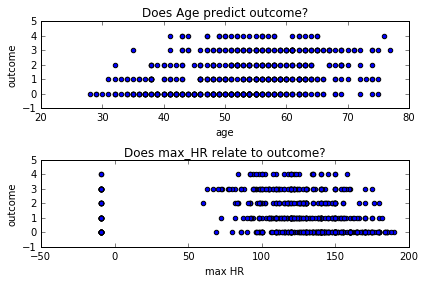

In [11]:
fig = plt.figure(figsize=(6,4))

ax1 = fig.add_subplot(211)
ax1.scatter(df.age,df.outcome)
plt.xlabel('age')
plt.ylabel('outcome')
plt.title('Does Age predict outcome?')

ax3 = fig.add_subplot(212)
ax3.scatter(df.max_hr,df.outcome)
plt.xlabel('max HR')
plt.ylabel('outcome')
plt.title('Does max_HR relate to outcome?')
fig.tight_layout()

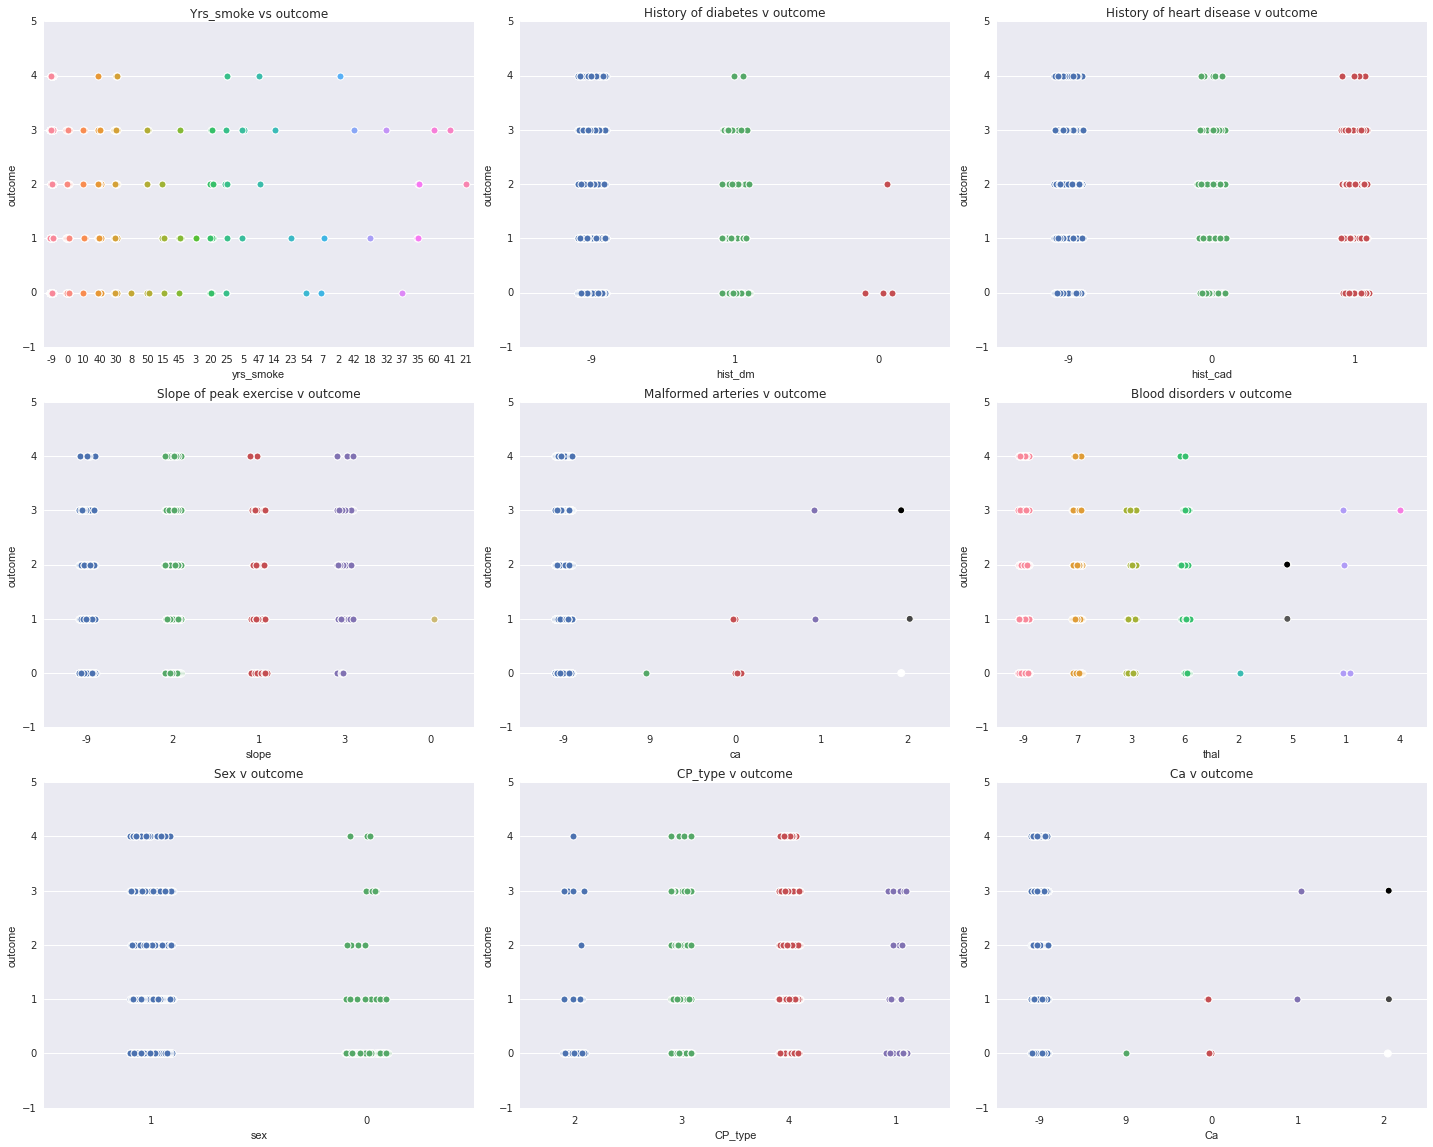

In [15]:
#Hard to see much with the tradition plot, adding some jitter
import seaborn as sns
fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(331)
a1 = sns.stripplot(df.yrs_smoke,df.outcome, jitter=True)
plt.xlabel('yrs_smoke')
plt.ylabel('outcome')
plt.title('Yrs_smoke vs outcome')

ax2 = fig.add_subplot(332)
a2 = sns.stripplot(df.hist_dm,df.outcome, jitter=True)
plt.xlabel('hist_dm')
plt.ylabel('outcome')
plt.title('History of diabetes v outcome')

ax3 = fig.add_subplot(333)
a3 = sns.stripplot(df.hist_cad,df.outcome, jitter=True)
plt.xlabel('hist_cad')
plt.ylabel('outcome')
plt.title('History of heart disease v outcome')

ax4 = fig.add_subplot(334)
a4 = sns.stripplot(df.slope,df.outcome, jitter=True)
plt.xlabel('slope')
plt.ylabel('outcome')
plt.title('Slope of peak exercise v outcome')
fig.tight_layout()

ax5 = fig.add_subplot(335)
a5 = sns.stripplot(df.ca,df.outcome, jitter=True)
plt.xlabel('ca')
plt.ylabel('outcome')
plt.title('Malformed arteries v outcome')
fig.tight_layout()

ax6 = fig.add_subplot(336)
a6 = sns.stripplot(df.thal,df.outcome, jitter=True)
plt.xlabel('thal')
plt.ylabel('outcome')
plt.title('Blood disorders v outcome')
fig.tight_layout()

ax7 = fig.add_subplot(337)
a7 = sns.stripplot(df.sex,df.outcome, jitter=True)
plt.xlabel('sex')
plt.ylabel('outcome')
plt.title('Sex v outcome')
fig.tight_layout()

ax8 = fig.add_subplot(338)
a8 = sns.stripplot(df.cp_type,df.outcome, jitter=True)
plt.xlabel('CP_type')
plt.ylabel('outcome')
plt.title('CP_type v outcome')
fig.tight_layout()

ax9 = fig.add_subplot(339)
a9 = sns.stripplot(df.ca,df.outcome, jitter=True)
plt.xlabel('Ca')
plt.ylabel('outcome')
plt.title('Ca v outcome')
fig.tight_layout()

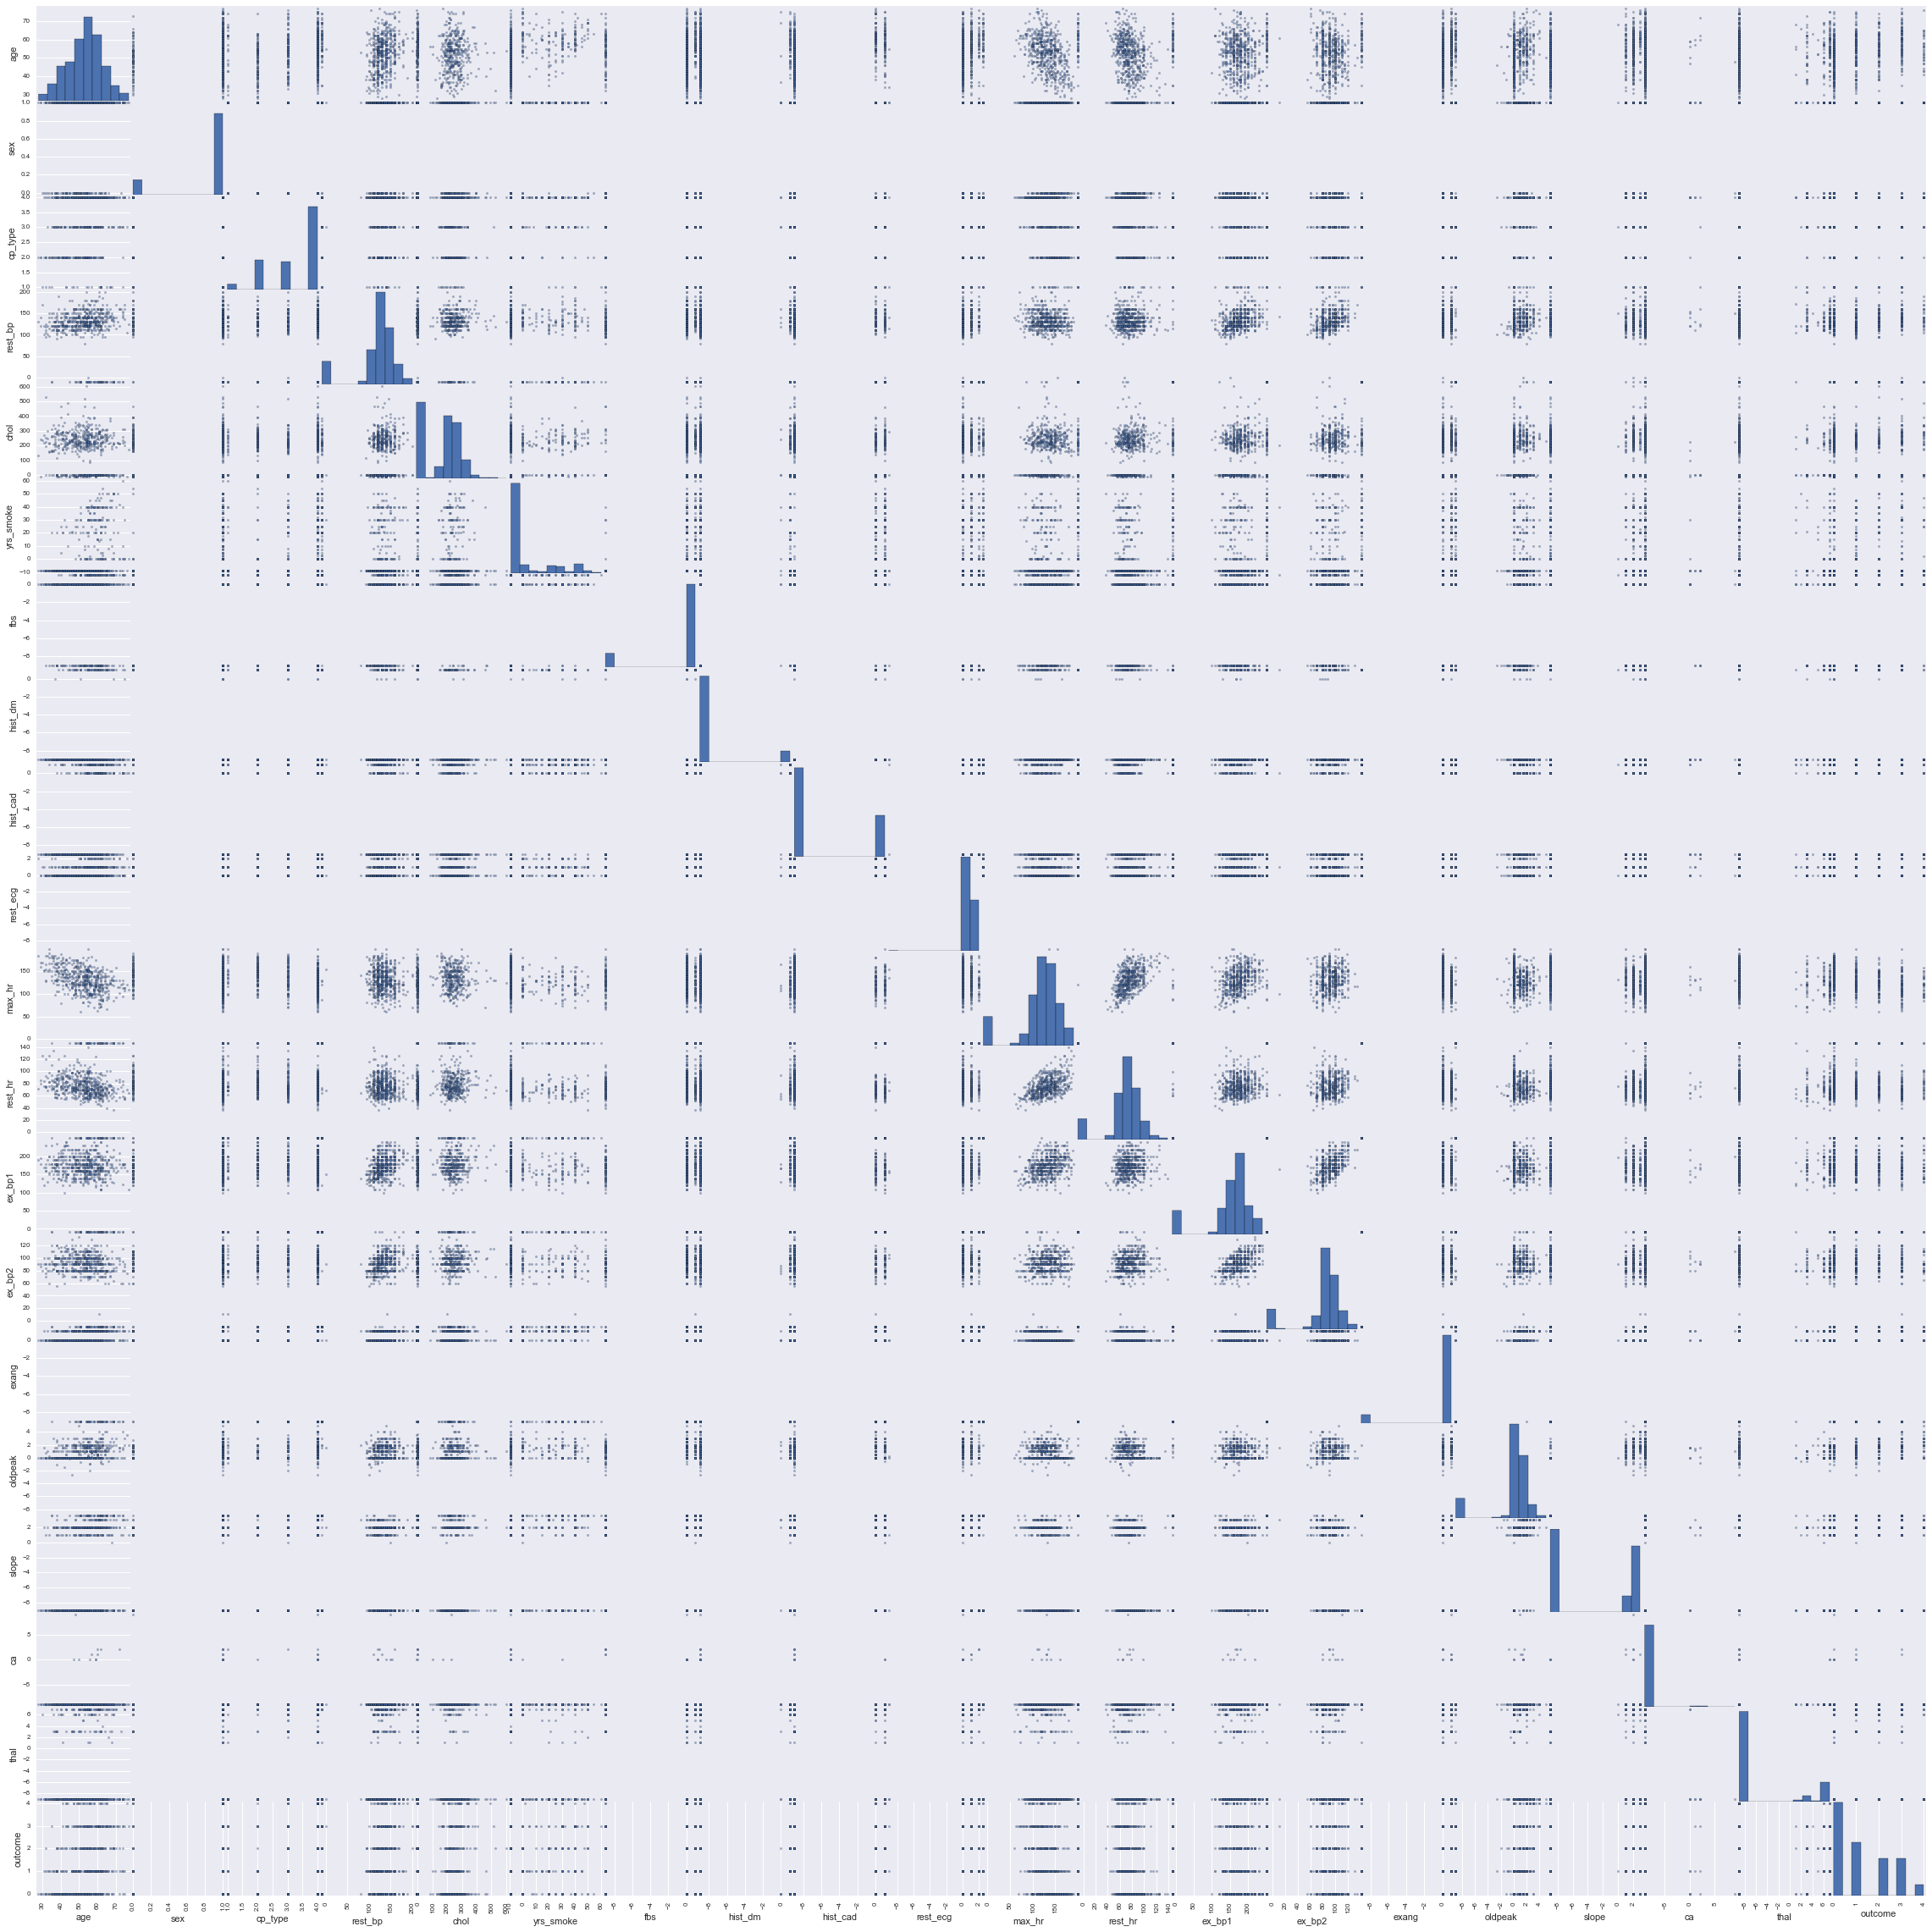

In [13]:
#Plotting one-by-one seems tedious. Lets try something different -
from pandas.tools.plotting import scatter_matrix
plot = scatter_matrix(df, figsize=(40, 40))

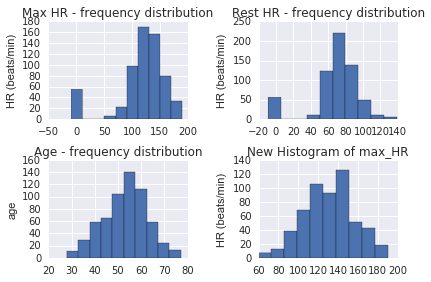

In [14]:
#Now I'm trying to get a feel for the negative values and what the data looks like if I exclude the negative values

fig = plt.figure(figsize=(6,4))

ax1 = fig.add_subplot(221)
plt.hist(df.max_hr) # Need to find and drop these 0s 
plt.title('Max HR - frequency distribution')
plt.ylabel('HR (beats/min)')

ax2 = fig.add_subplot(222)
plt.hist(df.rest_hr) # Need to find and drop these 0s 
plt.title('Rest HR - frequency distribution')
plt.ylabel('HR (beats/min)')

ax3 = fig.add_subplot(223)
plt.hist(df.age) #Since I imported SNS above, everything now defaults to seaborn style? how do i fix this?
plt.title('Age - frequency distribution')
plt.ylabel('age')

ax4 = fig.add_subplot(224)
max_hr_pos = df[df.max_hr >= 0] #We don't want to eliminate the whole rows for the negative values, we just want to replace with Nan
plt.hist(max_hr_pos.max_hr)
plt.title('New Histogram of max_HR')
plt.ylabel('HR (beats/min)')

fig.tight_layout()

# Something funny is going on with the HRs - why are there negative numbers? Going to explore this


In [16]:
rest_hr_pos = df[df.rest_hr >= 0] #Again just filtering out the negative ones for graphing purposes

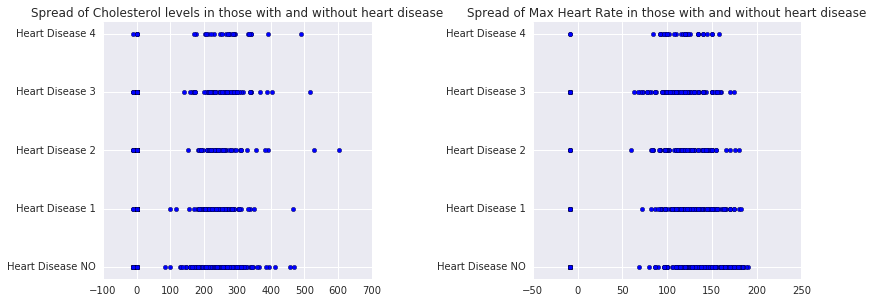

In [17]:
#I'm going to divide the data by outcome group 
#I'm just going to explore if there are obvious differences in these features between the groups. 
chd_pos = df[df.outcome >= 1] 
chd_neg = df[df.outcome == 0]
#Going to look at cholesterol and max HR first
fig = plt.figure(figsize =(12,8))
ax = fig.add_subplot(221)
n=4
ind1=np.arange(pd.value_counts(chd_neg['outcome']))
y = chd_pos['chol'] #, chd_neg['chol']]
x = chd_pos.outcome
ax.scatter(y, x)
ax.scatter(chd_neg['chol'], chd_neg['outcome'], cmap='gray')
ax.set_ylim(-.2,4.2)
ax.set_title('Spread of Cholesterol levels in those with and without heart disease')
yTickMarks = ['', 'Heart Disease NO', 'Heart Disease 1', 'Heart Disease 2', 'Heart Disease 3', 'Heart Disease 4']
ax.set_yticklabels(yTickMarks)


ax1 = fig.add_subplot(222)
n=4
ind1=np.arange(pd.value_counts(chd_neg['outcome']))
y = chd_pos['max_hr'] #, chd_neg['chol']]
x = chd_pos.outcome
ax1.scatter(y, x)
ax1.scatter(chd_neg['max_hr'], chd_neg['outcome'], cmap='gray')
ax1.set_ylim(-.2,4.2)
ax1.set_title('Spread of Max Heart Rate in those with and without heart disease')
yTickMarks = ['', 'Heart Disease NO', 'Heart Disease 1', 'Heart Disease 2', 'Heart Disease 3', 'Heart Disease 4']
ax1.set_yticklabels(yTickMarks)

fig.tight_layout()

In [18]:
#Now I'm exploring some of those columns that seemed to have all negative #s 
#like yrs_smoke, hist_dm, hist_cad, slope, ca, and thal
#I'm going to explore some of this columns with -9s to see if they take up the entire column. 

## Task 2 - revisited) Looking for Null values or missing values 
### Now i've determined there are no null values but there are a lot of "-9"s in lieu of null values. 

In [1]:
#I'm going to try a few different ways of feature/selection missing values to see what impact it has on the data

## option 1 - regular data, -9s and 0s present, all data included 
## option 2 - thresholded 50%; discrete variables: change to ohe coded, impute continuous variables
## option 3 - thresholded 50; discrete variables: keep as label coded, impute continuous variables
## option 4 - normalized data - some classifiers like regression and svm require normalized data

#### Option 1:  Regular data - 0s and -9s included instead of NaNs

In [20]:
features = df.iloc[:, :-1]
target = df.outcome

##### Option 2: - thresholded 50%; discrete variables: changed to ohe coding, impute contunous variables

In [21]:
collist1=['age','rest_bp','chol','yrs_smoke','max_hr','rest_hr','ex_bp1','ex_bp2'] #list of not categorical features where -9s and 0s need to be turned into NaNs
collist2 = ['sex','cp_type','fbs','hist_dm','hist_cad','rest_ecg','exang','slope','ca','thal','oldpeak']
#list of not categorical and not catergorical features where -9s only need to be turned into NaNs

In [22]:
df_notcat = df[collist1]
df_notcat = df_notcat[df_notcat > 0] #Replacing the -9s and 0s with NaNs

In [23]:
df_cat = df[collist2]
df_cat = df_cat[df_cat > -9] #Replacing the -9s with NaNs

In [24]:
frames = [df_notcat, df_cat]

In [25]:
df_hasnull = pd.concat(frames, axis=1)
df_hasnull.head()

,age,rest_bp,chol,yrs_smoke,max_hr,rest_hr,ex_bp1,ex_bp2,sex,cp_type,fbs,hist_dm,hist_cad,rest_ecg,exang,slope,ca,thal,oldpeak
0,40,140.0,289.0,NaN,172.0,86.0,200.0,110.0,1,2,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
1,49,160.0,180.0,NaN,156.0,100.0,220.0,106.0,0,3,0.0,NaN,NaN,0.0,0.0,2.0,NaN,NaN,1.0
2,37,130.0,283.0,NaN,98.0,58.0,180.0,100.0,1,2,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,0.0
3,48,138.0,214.0,NaN,108.0,54.0,210.0,106.0,0,4,0.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.5
4,54,150.0,NaN,NaN,122.0,74.0,130.0,100.0,1,3,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0


In [26]:
print df_hasnull.isnull().sum()
print (len(df_hasnull)) 

age            0
rest_bp       60
chol         202
yrs_smoke    465
max_hr        55
rest_hr       56
ex_bp1        63
ex_bp2        63
sex            0
cp_type        0
fbs           90
hist_dm      545
hist_cad     422
rest_ecg       2
exang         55
slope        308
ca           606
thal         475
oldpeak       62
dtype: int64
617


In [27]:
df_hasnull = df_hasnull.dropna(axis=1,thresh=308)
df_hasnull.info() #Excluding columns with greater than 50% missing values. 
#Even if we impute these values, it won't buy us much.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 122
Data columns (total 14 columns):
age         617 non-null int64
rest_bp     557 non-null float64
chol        415 non-null float64
max_hr      562 non-null float64
rest_hr     561 non-null float64
ex_bp1      554 non-null float64
ex_bp2      554 non-null float64
sex         617 non-null int64
cp_type     617 non-null int64
fbs         527 non-null float64
rest_ecg    615 non-null float64
exang       562 non-null float64
slope       309 non-null float64
oldpeak     555 non-null float64
dtypes: float64(11), int64(3)
memory usage: 72.3 KB


In [28]:
cont_col_missing = ['rest_bp','chol','max_hr','rest_hr','ex_bp1','ex_bp2','oldpeak']

In [29]:
#I will now go through the columns of missing values and see if there is any relation between the column with missing values
# and any other columns 
def plot_features(x, title):
    plt.figure(figsize=(10,14));
    i = 0
    for col in cont_col_missing:
        i += 1
        plt.subplot(7,2,i)
        plt.scatter(df_hasnull[col], df_hasnull[x])
        plt.title(title % (col, x))
        plt.tight_layout()

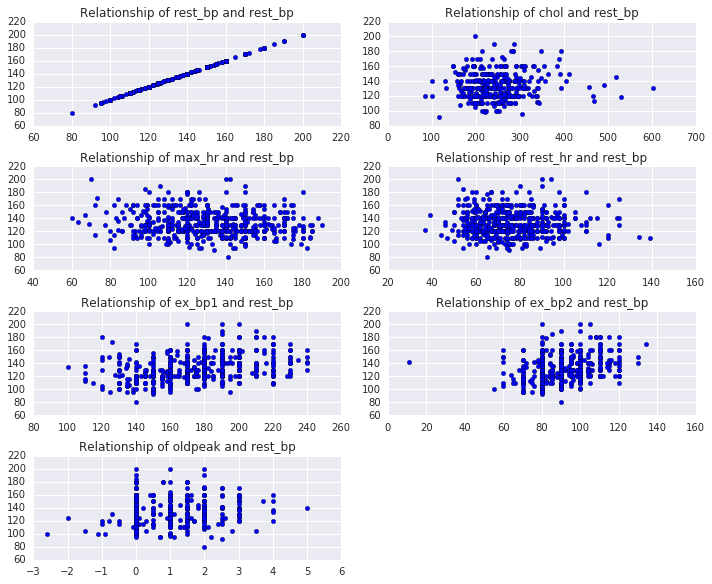

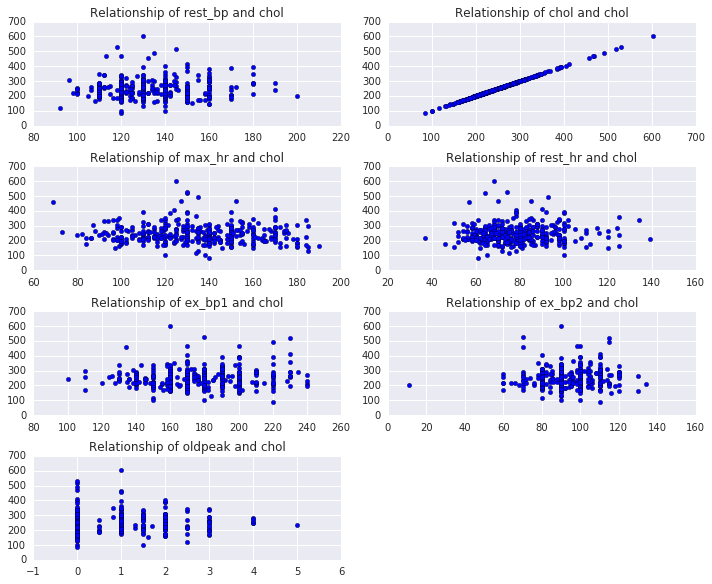

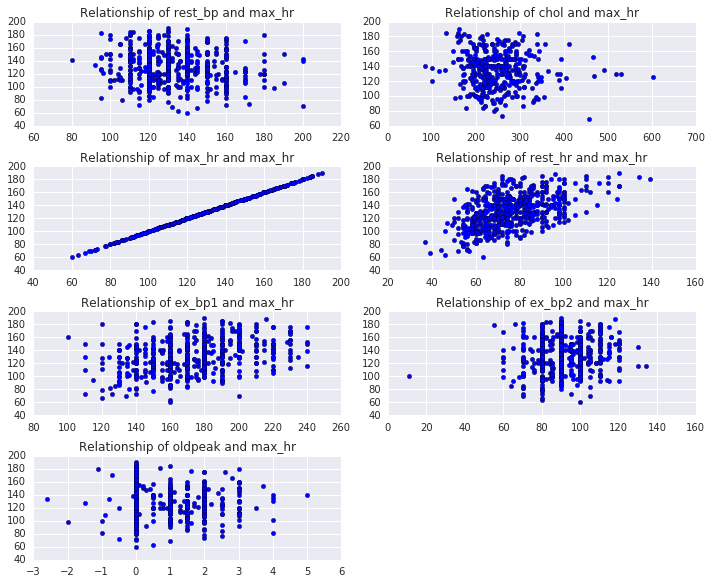

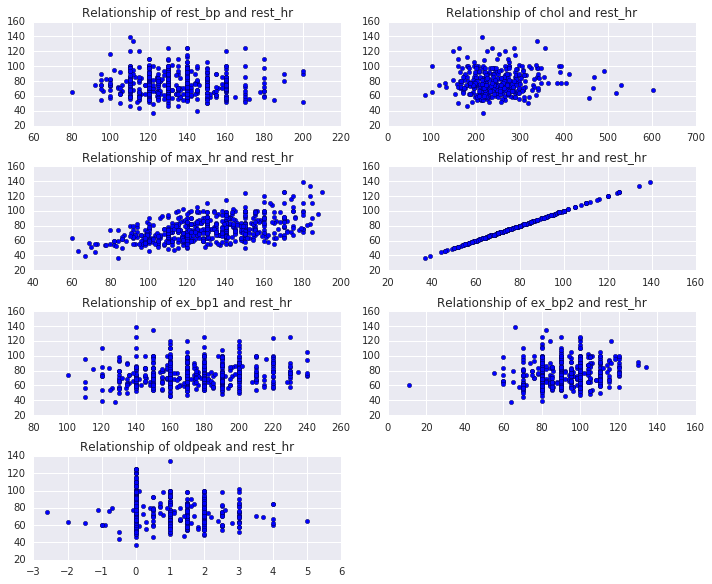

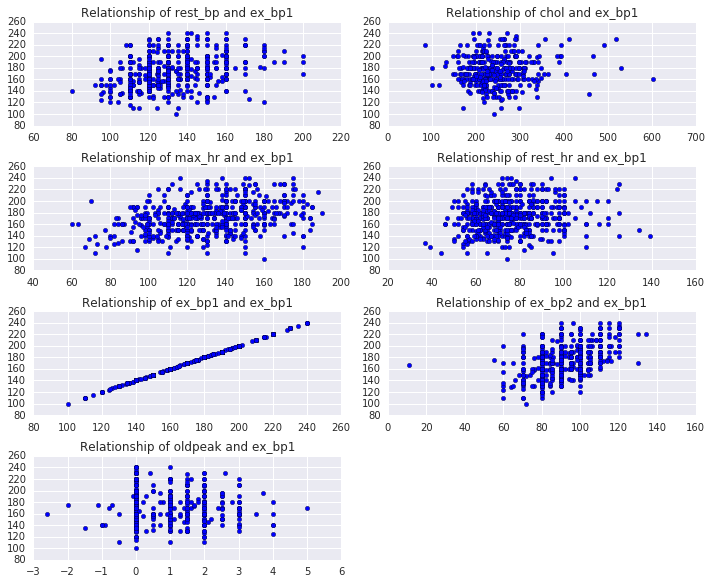

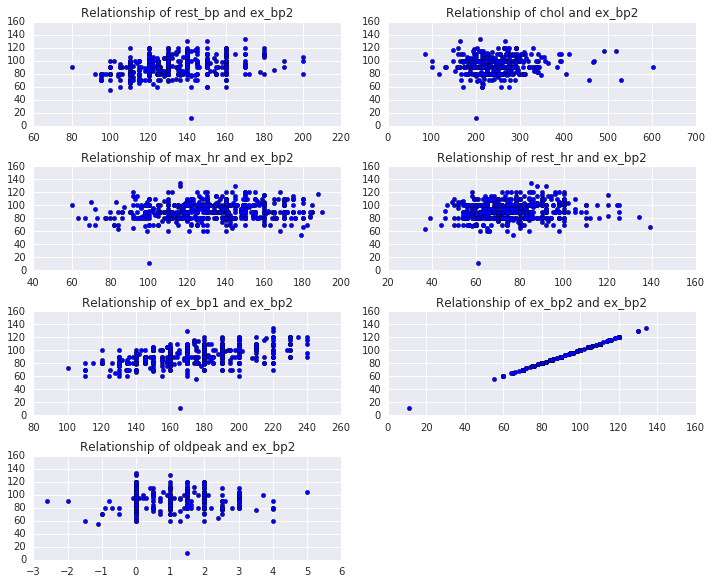

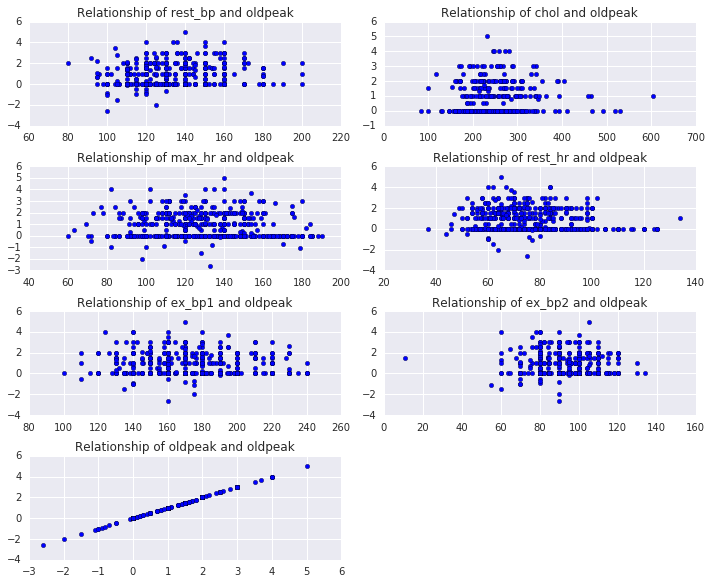

In [30]:
for x in cont_col_missing:
    plot_features(x, 'Relationship of %s and %s')
#columns with missing valuesplot_features('rest_bp', 'Relationship of %s and rest bp')

In [109]:
#Looking for possible linear relationships from graphs above
from pandas.stats.api import ols
res = ols(y=df_hasnull.ex_bp2, x=df_hasnull.ex_bp1)
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         1509
Number of Degrees of Freedom:   2

R-squared:         0.0236
Adj R-squared:     0.0230

Rmse:             12.5557

F-stat (1, 1507):    36.4911, p-value:     0.0000

Degrees of Freedom: model 1, resid 1507

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0776     0.0128       6.04     0.0000     0.0524     0.1028
     intercept    77.4194     2.2370      34.61     0.0000    73.0348    81.8040
---------------------------------End of Summary---------------------------------

In [32]:
from pandas.stats.api import ols
res = ols(y=df_hasnull.rest_hr, x=df_hasnull.max_hr)
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         1284
Number of Degrees of Freedom:   2

R-squared:         0.0249
Adj R-squared:     0.0241

Rmse:             14.7905

F-stat (1, 1282):    32.7301, p-value:     0.0000

Degrees of Freedom: model 1, resid 1282

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0939     0.0164       5.72     0.0000     0.0617     0.1261
     intercept    62.5283     2.1707      28.81     0.0000    58.2737    66.7829
---------------------------------End of Summary---------------------------------

In [33]:
cat_feat = ['sex','cp_type','fbs', 'rest_ecg', 'exang', 'slope']

In [34]:
for col in df_hasnull:
    if col not in cat_feat:
        df_hasnull.loc[:,col].fillna(df_hasnull[col].mean(), inplace=True)

In [35]:
df_hasnull_ohe = df_hasnull.copy()

In [36]:
df_ohe = df_hasnull_ohe.fillna(0)
df_ohe = pd.get_dummies(df_ohe, columns=cat_feat, dummy_na=True)
df_ohe.head()

,age,rest_bp,chol,max_hr,rest_hr,ex_bp1,ex_bp2,oldpeak,sex_0.0,sex_1.0,...,rest_ecg_2.0,rest_ecg_nan,exang_0.0,exang_1.0,exang_nan,slope_0.0,slope_1.0,slope_2.0,slope_3.0,slope_nan
0,40,140.0,289.00000,172.0,86.0,200.0,110.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,49,160.0,180.00000,156.0,100.0,220.0,106.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,130.0,283.00000,98.0,58.0,180.0,100.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,48,138.0,214.00000,108.0,54.0,210.0,106.0,1.5,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,54,150.0,246.93494,122.0,74.0,130.0,100.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
features_ohe = df_ohe

##### Option 3: thresholded 50; discrete variables: label coding, impute contunous variables

In [38]:
#Typically, random forest methods and other methods encourage two ways of handling missing values if we don't know
#anything about the data: The first step is to look for relationships with the data - can one variable predict another? 
#a) drop data points with missing values (not recommended); 
#b) fill in missing values with the median (for numerical values) or mode (for categorical values). 

In [39]:
df_hasnull_label = df_hasnull.copy() #Already thresholded and continous variables have been imputed

In [40]:
cat_col_missing = ['fbs','rest_ecg','exang','slope'] #list of the categorical features with missing values 

In [41]:
for col in cat_col_missing:
        df_hasnull_label.loc[:,col].fillna(df_hasnull_label[col].mode().iloc[0], inplace=True)

In [42]:
features_label = df_hasnull_label

##### Option 4: normalized data - some classifiers like regression and svm require normalized data

In [43]:
collist1=['age','rest_bp','chol','max_hr','rest_hr',
                'ex_bp1','ex_bp2','oldpeak']
df_norm1 = df_hasnull_label[collist1]

In [44]:
collist2 = ['sex','cp_type','fbs','rest_ecg','exang','slope']
df_categorical = df_hasnull_label[collist2]

In [45]:
df_norm2 = (df_norm1 - df_norm1.mean()) /  (df_norm1.std())
df_norm2.head()

,age,rest_bp,chol,max_hr,rest_hr,ex_bp1,ex_bp2,oldpeak
0,-1.362338,0.408645,8.136630e-01,1.706393,0.713289,1.052745,1.438861,-0.800631
1,-0.423162,1.514646,-1.294720e+00,1.039789,1.680349,1.846242,1.125309,0.211556
2,-1.675397,-0.144356,6.976052e-01,-1.376649,-1.220829,0.259247,0.654980,-0.800631
3,-0.527515,0.298045,-6.370594e-01,-0.960022,-1.497132,1.449494,1.125309,0.717650
4,0.098602,0.961645,1.044544e-14,-0.376744,-0.115619,-1.724496,0.654980,-0.800631


In [46]:
df_categorical.head()

,sex,cp_type,fbs,rest_ecg,exang,slope
0,1,2,0.0,0.0,0.0,2.0
1,0,3,0.0,0.0,0.0,2.0
2,1,2,0.0,1.0,0.0,2.0
3,0,4,0.0,0.0,1.0,2.0
4,1,3,0.0,0.0,0.0,2.0


In [47]:
normdata = [df_categorical, df_norm2]

In [48]:
df_norm = pd.concat(normdata, axis=1)
df_norm.head()

,sex,cp_type,fbs,rest_ecg,exang,slope,age,rest_bp,chol,max_hr,rest_hr,ex_bp1,ex_bp2,oldpeak
0,1,2,0.0,0.0,0.0,2.0,-1.362338,0.408645,8.136630e-01,1.706393,0.713289,1.052745,1.438861,-0.800631
1,0,3,0.0,0.0,0.0,2.0,-0.423162,1.514646,-1.294720e+00,1.039789,1.680349,1.846242,1.125309,0.211556
2,1,2,0.0,1.0,0.0,2.0,-1.675397,-0.144356,6.976052e-01,-1.376649,-1.220829,0.259247,0.654980,-0.800631
3,0,4,0.0,0.0,1.0,2.0,-0.527515,0.298045,-6.370594e-01,-0.960022,-1.497132,1.449494,1.125309,0.717650
4,1,3,0.0,0.0,0.0,2.0,0.098602,0.961645,1.044544e-14,-0.376744,-0.115619,-1.724496,0.654980,-0.800631


In [49]:
features_norm = df_norm

## Further exploration - what features are important for distinguishing heart disease from no heart disease?

In [50]:
#I'm just going to turn this into a binary problem where 0 is no heart disease and 1 means 
# the patient developed heart disease (irrespective of the type of heart disease)

In [51]:
target_binary = target.replace(to_replace=[2,3,4], value=1,)
target_binary.value_counts()

1    370
0    247
Name: outcome, dtype: int64

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
#I'd like to know the important features that distinguish heart disease from no heart disease. I don't care about accuracy
#so much here.
dtree = DecisionTreeClassifier(class_weight='balanced', max_depth=3)
log = LogisticRegression(class_weight='balanced')
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import cross_val_score 

In [54]:
X = features_ohe
y = target_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [55]:
clf = dtree.fit(X_train, y_train)
cross_val_score(clf, X_train, y_train, cv=5)

array([ 0.6969697 ,  0.76767677,  0.78787879,  0.75757576,  0.79381443])

In [56]:
clf.feature_importances_

array([ 0.10653267,  0.        ,  0.        ,  0.02547074,  0.08581093,
        0.        ,  0.        ,  0.        ,  0.03553502,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.56601425,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.11213624,  0.        ,  0.06850015,  0.        ,  0.        ])

In [57]:
feature_cols = features_ohe.columns

In [58]:
len(X_train)

493

In [59]:
from sklearn.tree import export_graphviz
with open("tree.dot", 'wb') as f:
    f = export_graphviz(clf, out_file=f, feature_names=feature_cols)

<img src="tree.png">

## Task4: Check for imbalanced class set.

In [60]:
df.outcome.value_counts(normalize=True)

0    0.400324
1    0.228525
3    0.162075
2    0.160454
4    0.048622
Name: outcome, dtype: float64

## Task5: Exploring models 

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import cross_val_score 
from sklearn.metrics import (auc, roc_curve, roc_auc_score,
                             accuracy_score, precision_score,
                             recall_score, f1_score, )
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [62]:
logistic = LogisticRegression(C=1, multi_class='ovr', solver='lbfgs', class_weight='balanced')
treeclf = DecisionTreeClassifier(class_weight='balanced')
forest = RandomForestClassifier(class_weight='balanced')
svc = SVC(class_weight='balanced')
svc_lin = SVC(class_weight='balanced', kernel='linear')
knn = KNeighborsClassifier()

In [63]:
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 1 above - all data left in, no imputation

In [64]:
def classifier_metrics_accuracy(clf, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

    clf.fit(X_train, y_train)

    print '%30s: %s' % ('Default score (accuracy)', clf.score(X_train, y_train))
    print '%30s: %s' % ('Cross val score', cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())

In [65]:
def classifier_metrics_roc(clf, title):
    y1 = label_binarize(target, classes=[0, 1, 2, 3, 4])
    n_classes = y1.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=1)

    clf1 = OneVsRestClassifier(clf).fit(X_train, y_train)
    #clf1.fit(X_train, y_train)
    
    print title
    for i in range(n_classes):

        print 'AUC for class %s is %s:' % (i, (cross_val_score(clf1, X_train, y_train[:,i], cv=5, scoring='roc_auc').mean()))
        print 'Precision for class %s is %s:' % (i, (cross_val_score(clf1, X_train, y_train[:,i], cv=5, 
                                                                        scoring='precision_weighted').mean()))
        print 'Recall for class %s is %s:' % (i, (cross_val_score(clf1, X_train, y_train[:,i], cv=5, 
                                                                        scoring='recall_weighted').mean()))
        print 'F1 for class %s is %s:' % (i, (cross_val_score(clf1, X_train, y_train[:,i], cv=5, 
                                                                        scoring='f1_weighted').mean()))
        print '\n'
        

In [67]:
for clf in [logistic, treeclf, forest, svc, knn, svc_lin]:
    title = 'Data includes missing values - no imputation' 
    print 'Metrics for %s' % clf
    print '=' * 50
    classifier_metrics_roc(clf, title)
    classifier_metrics_accuracy(clf, title)
    print '\n'

Metrics for LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
Data includes missing values - no imputation
AUC for class 0 is 0.851825505732:
Precision for class 0 is 0.798480569974:
Recall for class 0 is 0.790877850672:
F1 for class 0 is 0.791451346035:


AUC for class 1 is 0.686686498856:
Precision for class 1 is 0.731262520982:
Recall for class 1 is 0.632760595647:
F1 for class 1 is 0.659105543829:


AUC for class 2 is 0.60031124498:
Precision for class 2 is 0.757423505613:
Recall for class 2 is 0.573922902494:
F1 for class 2 is 0.628229977709:


AUC for class 3 is 0.711798319328:
Precision for class 3 is 0.818503525213:
Recall for class 3 is 0.669313955885:
F1 for class 3 is 0.715565739398:


AUC for class 4 is 0.74246167925:
Precision for class 4 is 0.929052284265:
Reca

In [68]:
model = DecisionTreeClassifier()

In [69]:
maxdepth = []
for i in range(1,20):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    maxdepth.append(model.score(X_train,y_train))

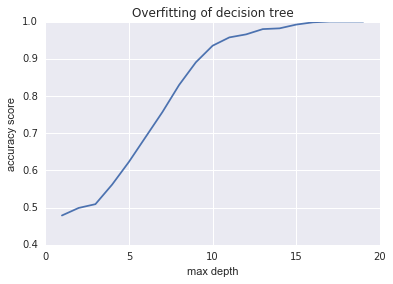

In [70]:
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,20),maxdepth)
plt.title('Overfitting of decision tree')
plt.xlabel('max depth')
plt.ylabel('accuracy score')
plt.show()

In [112]:
X = features_ohe
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 2 above - ohe coding, continuous data imputed

In [113]:
for clf in [logistic, treeclf, forest, svc, knn]:
    title = 'OHE labeled, continuous data imputed' 
    print 'Metrics for %s' % clf
    print '=' * 50
    classifier_metrics_accuracy(clf, title)
    print '\n'
    classifier_metrics_roc(clf, title)
    print '\n'

Metrics for LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
      Default score (accuracy): 0.53752535497
               Cross val score: 0.477236486404


OHE labeled, continuous data imputed
AUC for class 0 is 0.869612234961:
Precision for class 0 is 0.785734815292:
Recall for class 0 is 0.77665312923:
F1 for class 0 is 0.777314457163:


AUC for class 1 is 0.691565633451:
Precision for class 1 is 0.742221952274:
Recall for class 1 is 0.647110278038:
F1 for class 1 is 0.67199489431:


AUC for class 2 is 0.64468875502:
Precision for class 2 is 0.79659168292:
Recall for class 2 is 0.590208204494:
F1 for class 2 is 0.644291199076:


AUC for class 3 is 0.728454981993:
Precision for class 3 is 0.814405618926:
Recall for class 3 is 0.663192331478:
F1 for class 3 is 0.70987281974

In [73]:
X = features_label
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 3 above - label coding, continuous data imputed

In [74]:
for clf in [logistic, treeclf, forest, svc, knn]:
    title = 'Label coded, continuous data imputed' 
    print 'Metrics for %s' % clf
    print '=' * 50
    classifier_metrics_roc(clf, title)
    classifier_metrics_accuracy(clf, title)
    print '\n'

Metrics for LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
Label coded, continuous data imputed
AUC for class 0 is 0.847643899488:
Precision for class 0 is 0.781147377935:
Recall for class 0 is 0.77475788816:
F1 for class 0 is 0.775582816042:


AUC for class 1 is 0.675081755773:
Precision for class 1 is 0.730814781285:
Recall for class 1 is 0.596480266583:
F1 for class 1 is 0.626258091566:


AUC for class 2 is 0.622008032129:
Precision for class 2 is 0.779516779908:
Recall for class 2 is 0.563924963925:
F1 for class 2 is 0.61976047744:


AUC for class 3 is 0.744683473389:
Precision for class 3 is 0.831064717005:
Recall for class 3 is 0.677478045764:
F1 for class 3 is 0.722636968826:


AUC for class 4 is 0.86535117822:
Precision for class 4 is 0.9404961614:
Recall for clas

In [75]:
X = features_norm
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 4 above - normalized continous data, imputed discrete data

In [76]:
for clf in [logistic, treeclf, forest, svc, knn]:
    title = 'Normalized data' 
    print 'Metrics for %s' % clf
    print '=' * 50
    classifier_metrics_roc(clf, title)
    classifier_metrics_accuracy(clf, title)
    print '\n'

Metrics for LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
Normalized data
AUC for class 0 is 0.851735130509:
Precision for class 0 is 0.774970152203:
Recall for class 0 is 0.768697282099:
F1 for class 0 is 0.769424822898:


AUC for class 1 is 0.672712988004:
Precision for class 1 is 0.72476306339:
Recall for class 1 is 0.608476517755:
F1 for class 1 is 0.637346140348:


AUC for class 2 is 0.620953815261:
Precision for class 2 is 0.785201766238:
Recall for class 2 is 0.567985982272:
F1 for class 2 is 0.624581338942:


AUC for class 3 is 0.749992797119:
Precision for class 3 is 0.827562957517:
Recall for class 3 is 0.671355184498:
F1 for class 3 is 0.717427249865:


AUC for class 4 is 0.831040951727:
Precision for class 4 is 0.934847389292:
Recall for class 4 is 0.80731106

In [77]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from scipy import interp
from itertools import cycle

### *Moving forward with OHE labeled data and RF model*

## Task 7) Hyperparameter optimizaton

In [78]:
## Tuning selected model

In [79]:
X = features_ohe
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [81]:
PARAMETERS = {'max_features':['auto','sqrt',0.2], 'max_leaf_nodes':[None,5,6,7,8,9,10,50], 
              'min_samples_leaf':[1,2,4,50], 'criterion':['gini','entropy'], 'n_estimators':[6,8,10,20,25]}
SCORING = 'accuracy'

from sklearn import grid_search

#Grid Search
model = RandomForestClassifier(class_weight='balanced')
clf = grid_search.GridSearchCV(model, PARAMETERS, scoring=SCORING, verbose=True)
clf.fit(X_train, y_train)

#After completion, show the final best results and scores
print clf.best_estimator_
print clf.best_score_

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   17.8s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   35.5s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   55.4s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:  1.9min


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.515212981744


[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:  2.3min finished


## Task7: Test the selected model

In [82]:
rf_model = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
X = features_ohe
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [84]:
clf = rf_model.fit(X_train, y_train)
y_eval = clf.predict(X_test)

In [85]:
clf.feature_importances_

array([ 0.11699184,  0.07554468,  0.07764958,  0.09038161,  0.09161021,
        0.05695391,  0.06027916,  0.10784738,  0.00619742,  0.01402382,
        0.        ,  0.00495159,  0.0328987 ,  0.01150366,  0.05626863,
        0.        ,  0.01201029,  0.01184008,  0.        ,  0.01829725,
        0.01777239,  0.00653265,  0.        ,  0.01523707,  0.03279776,
        0.        ,  0.04169349,  0.01099745,  0.01998447,  0.00973491,  0.        ])

In [86]:
features_ohe.columns

Index([u'age', u'rest_bp', u'chol', u'max_hr', u'rest_hr', u'ex_bp1',
       u'ex_bp2', u'oldpeak', u'sex_0.0', u'sex_1.0', u'sex_nan',
       u'cp_type_1.0', u'cp_type_2.0', u'cp_type_3.0', u'cp_type_4.0',
       u'cp_type_nan', u'fbs_0.0', u'fbs_1.0', u'fbs_nan', u'rest_ecg_0.0',
       u'rest_ecg_1.0', u'rest_ecg_2.0', u'rest_ecg_nan', u'exang_0.0',
       u'exang_1.0', u'exang_nan', u'slope_0.0', u'slope_1.0', u'slope_2.0',
       u'slope_3.0', u'slope_nan'],
      dtype='object')

In [87]:
y1 = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y1.shape[1]

In [88]:
y2 = label_binarize(y_eval, classes=[0, 1, 2, 3, 4])

## Assessing model: 

#### Accuracy

In [89]:
print "Overall model accuracy is %s" % (accuracy_score(y_test, y_eval))

Overall model accuracy is 0.467741935484


In [90]:
for i in range(n_classes):
    print "Class %s" % i
    print accuracy_score(y1[:, i], y2[:, i])
    print '\n'

Class 0
0.846774193548


Class 1
0.637096774194


Class 2
0.774193548387


Class 3
0.75


Class 4
0.927419354839




#### Classification Report

In [91]:
from sklearn.metrics import classification_report

In [92]:
for i in range(n_classes):
    print "Class %s" % i
    print classification_report(y1[:, i], y2[:, i], labels=[1, 0])

Class 0
             precision    recall  f1-score   support

          1       0.77      0.79      0.78        43
          0       0.89      0.88      0.88        81

avg / total       0.85      0.85      0.85       124

Class 1
             precision    recall  f1-score   support

          1       0.24      0.30      0.26        27
          0       0.79      0.73      0.76        97

avg / total       0.67      0.64      0.65       124

Class 2
             precision    recall  f1-score   support

          1       0.27      0.19      0.22        21
          0       0.84      0.89      0.87       103

avg / total       0.75      0.77      0.76       124

Class 3
             precision    recall  f1-score   support

          1       0.46      0.41      0.44        29
          0       0.83      0.85      0.84        95

avg / total       0.74      0.75      0.75       124

Class 4
             precision    recall  f1-score   support

          1       0.00      0.00      0.00    

In [93]:
print f1_score(y_test, y_eval, average=None)

[ 0.7816092   0.26229508  0.22222222  0.43636364  0.        ]


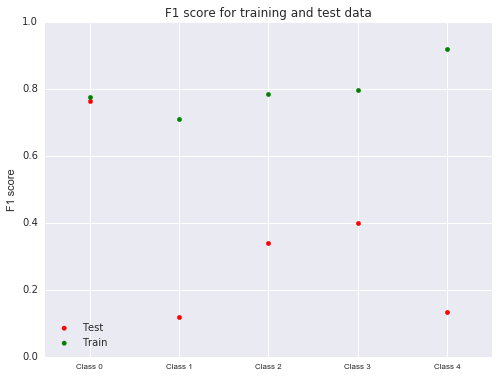

In [94]:
f1_test = [0.76470588, 0.11764706, 0.34042553, 0.4, 0.13333333]
f1_train = [.7745, .7101, .7842, .7956, .9206]
y = [0, .2, .4, .6, .8]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

plt.scatter(y, f1_test, color='red', label='Test')
plt.scatter(y, f1_train, color='green', label='Train')
classes=[0, 0, 1, 2, 3, 4]
xTickMarks = ['Class '+ str(i) for i in classes]
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
plt.title('F1 score for training and test data')
plt.ylabel('F1 score')
plt.legend(loc='lower left')
plt.show()

#### ROC

In [95]:
for i in range(n_classes):
    print "Class %s" % i
    print roc_auc_score(y1[:,i], y2[:,i], average='weighted')
    print '\n'

Class 0
0.833620442148


Class 1
0.514127529591


Class 2
0.541840036986


Class 3
0.633212341198


Class 4
0.479166666667




###### Confusion matrix

In [96]:
values, counts = np.unique(y_eval, return_counts=True)
print values
print counts

[0 1 2 3 4]
[44 34 15 26  5]


In [97]:
values, counts = np.unique(y_test, return_counts=True)
print values
print counts

[0 1 2 3 4]
[43 27 21 29  4]


In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
X = features_ohe
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 2 above - ohe coding, continuous data imputed

In [100]:
conf_forest = confusion_matrix(y_test, y_eval)

In [101]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

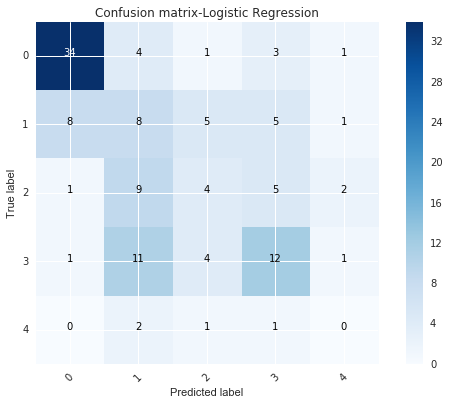

In [108]:
plot_confusion_matrix(conf_forest, classes=[0, 1, 2, 3, 4], title = 'Confusion matrix-Logistic Regression')
plt.show()